<a href="https://colab.research.google.com/github/kevinkmcguigan/experiments/blob/main/netCDF_download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#this is based on information found at:
#https://colab.research.google.com/github/astg606/py_materials/blob/master/science_data_format/introduction_netcdf4.ipynb#scrollTo=jzSepRxHhqhF

#some more info can be found at 
# https://towardsdatascience.com/read-netcdf-data-with-python-901f7ff61648

In [3]:
!pip install netCDF4

In [4]:
import datetime
import numpy as np
import netCDF4 as nc4

In [5]:
# Get the remote  file
nc_file = "sresa1b_ncar_ccsm3-example.nc"
url = "https://www.unidata.ucar.edu/software/netcdf/examples/"
import urllib.request
urllib.request.urlretrieve(url+nc_file, nc_file)

('sresa1b_ncar_ccsm3-example.nc', <http.client.HTTPMessage at 0x7f4955d25850>)

In [6]:
# Open the netCDF file and read surface air temperature
with nc4.Dataset(nc_file,'r') as ncid:
     lons      = ncid.variables['lon'][:] # longitude grid points
     lats      = ncid.variables['lat'][:] # latitude grid points
     levs      = ncid.variables['plev'][:] # pressure leves
     surf_temp = ncid.variables['tas'][:]
     uwind     = ncid.variables['ua'][:]

In [7]:
print(lons.shape)
print(lats.shape)
print(levs.shape)
print(surf_temp.shape)
print(uwind.shape)

(256,)
(128,)
(17,)
(1, 128, 256)
(1, 17, 128, 256)


In [14]:
# https://geo.nsstc.nasa.gov/satellite/goes16/abi/l1b/fullDisk/
# Get the remote  file
url = "https://geo.nsstc.nasa.gov/satellite/goes16/abi/l1b/fullDisk/OR_ABI-L1b-RadF-M6C01_G16_s20210860030172_e20210860039480_c20210860039525.nc"
url = "https://geo.nsstc.nasa.gov/satellite/goes16/abi/l1b/fullDisk/OR_ABI-L1b-RadF-M6C01_G16_s20210860040172_e20210860049480_c20210860049524.nc"
url = "https://geo.nsstc.nasa.gov/satellite/goes16/abi/l1b/fullDisk/OR_ABI-L1b-RadF-M6C02_G16_s20210860050172_e20210860059480_c20210860059516.nc"
import urllib.request
urllib.request.urlretrieve(url, nc_file)



('sresa1b_ncar_ccsm3-example.nc', <http.client.HTTPMessage at 0x7f4955891210>)

In [15]:
ncc = nc4.Dataset(nc_file,'r')
print(ncc)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (v35, 20 July 2016)
    institution: DOC/NOAA/NESDIS > U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    production_site: WCDAS
    production_environment: OE
    spatial_resolution: 0.5km at nadir
    orbital_slot: GOES-East
    platform_ID: G16
    instrument_type: GOES R Series Advanced Baseline Imager
    scene_id: Full Disk
    instrument_ID: FM1
    title: ABI L1b Radiances
    summary: Single reflective band ABI L1b Radiance Products are digital maps of outgoing radiance values at the top of the atmosphere for visible and near-IR bands.
    keywords: SPECTRAL/ENGINEERING > VISIBLE WAVELENGTHS > VISIBLE RADIANCE
 

In [16]:
# Open the netCDF file and read surface air temperature
with nc4.Dataset(nc_file,'r') as ncid:
     y      = ncid.variables['y'][:] # longitude grid points
     x      = ncid.variables['x'][:] # latitude grid points
     rad      = ncid.variables['Rad'][:] # latitude grid points


In [17]:
print(x.shape)
print(y.shape)
print(rad.shape)



(21696,)
(21696,)
(21696, 21696)


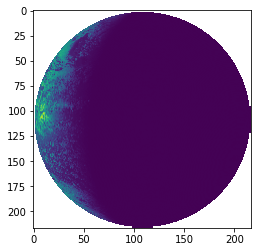

In [20]:
import matplotlib.pyplot as plt
plt.imshow(rad[::100,::100], )
plt.show()

In [ ]:
import plotly.express as px
fig = px.imshow(rad)
fig.update_layout(width=256, height=256, margin=dict(l=10, r=10, b=10, t=10))
fig.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
fig.show()